In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-reviews/amazon_reviews.csv


Columns: Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')
Total Reviews: 999
Average Sentiment: 0.23739493055391317
sentiment_label
Positive    882
Negative     84
Neutral      33
Name: count, dtype: int64


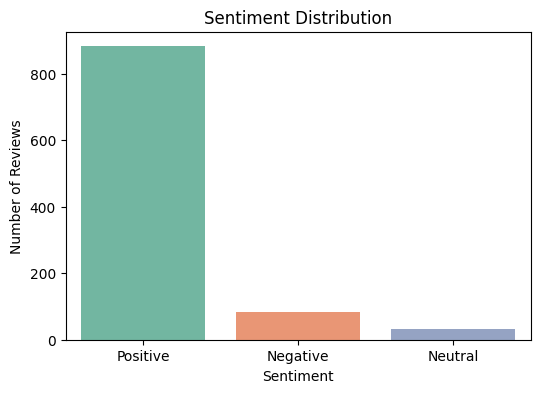

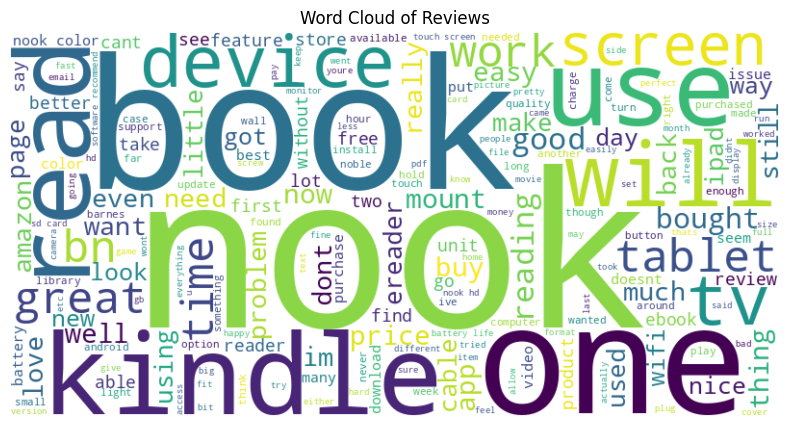

In [22]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Clean the review text
def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))  # remove URLs
    text = re.sub(r"[^a-zA-Z ]", "", text)    # remove non-alphabetic
    return text.lower()

# Analyze sentiment using TextBlob
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Load the dataset
file_path = "/kaggle/input/amazon-reviews/amazon_reviews.csv"  # 🔁 Replace with your actual filename
df = pd.read_csv(file_path)

# Preview and confirm column name
print("Columns:", df.columns)

# 🔁 Adjust column name as needed
df['cleaned'] = df['reviewText'].apply(clean_text)
df['sentiment'] = df['cleaned'].apply(analyze_sentiment)

# Classify as Positive, Neutral, Negative
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# === Summary ===
print("Total Reviews:", len(df))
print("Average Sentiment:", df['sentiment'].mean())
print(df['sentiment_label'].value_counts())

# === Visualization: Sentiment Distribution ===
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# === Word Cloud ===
text_all = " ".join(df['cleaned'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()
